# CNN关键知识点梳理及应用举例

## 一、神经网络
1.神经网络处理图片方式
2.前向传播，bp算法
3.处理图片的缺点：a.输入数据空间信息丢失；b.模型参数过多，容易过拟合；c.参数量巨大，难以训练

## 二、卷积神经网络CNN——卷积类型
### 1.标准卷积相关概念
1.卷积核、卷积计算、卷积偏置，卷积实质
2.图像边缘问题，padding，stride
3.感受野
4.标准卷积优势：a.保留空间信息；b.局部连接；c.权重共享；d.不同层级卷积提取不同特征

### 标准卷积应用

In [1]:
# 黑白边界监测，如何利用卷积操作来进行边界监测，卷积操作实质为对应乘后求和，可以利用卷积核[1, 0, -1]进行卷积
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn

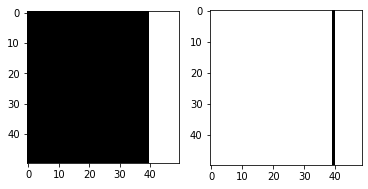

In [4]:
# 构造黑白分界图片
image = np.ones([50, 50], dtype='float32')
image[:, :40]=0
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
# 构造卷积核
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.weight = nn.Parameter(torch.tensor([[[[1,-1]]]], dtype=torch.float32)) ## 卷积核大小作用
        self.bias = nn.Parameter(torch.tensor([0], dtype=torch.float32))
    def forward(self, x):
        output = F.conv2d(x, self.weight, self.bias, stride=1, padding=0)
        return output
# 对构造的图片进行卷积
net = CNN()
image = torch.from_numpy(image)
image = torch.unsqueeze(image,0)
image = torch.unsqueeze(image, 0)
image_out = net(image)
image_out = image_out.squeeze()
image_out = image_out.detach().numpy()
plt.subplot(1, 2, 2)
plt.imshow(image_out, cmap='gray')

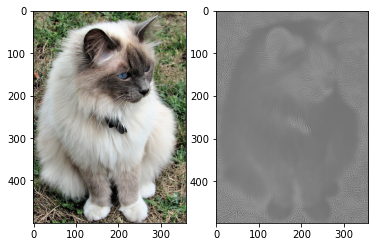

In [6]:
## 图像中物体边缘检测
# 读取并呈现图片
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
image = Image.open('./example.jpg') # size:(w, h)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
# 图片转换成Tensor ## image = ToTensor()(image)
# image_data = np.array(image).astype('float32') # size:(h,w, c) 
# image_data = np.transpose(image, (2, 0, 1))
# image_data = image_data.reshape([1, 3, image.height, image.width])
# image_tensor = torch.from_numpy(image_data).to(torch.float32)
image_tensor = ToTensor()(image)
image_tensor = torch.unsqueeze(image_tensor, 0)
# 定义卷积核
w = np.array([[-1, -1, -1],[-1,7,-1],[-1,-1,-1]], dtype='float32')/8
w = np.reshape(w,[1, 1, 3, 3])
w = np.repeat(w, 3, axis=1)
class CNN_2(nn.Module):
    def __init__(self, w):
        super(CNN_2,self).__init__()
        self.weight = nn.Parameter(torch.from_numpy(w)) # 必须为tensor类型
    
    def forward(self, x):
        return F.conv2d(x, self.weight, stride=1, padding=0)

# 卷积操作
net2 = CNN_2(w)
image_out = net2(image_tensor)
# 卷积后图片展示
image_out = image_out.detach().numpy()
image_out = np.squeeze(image_out)
plt.subplot(1, 2, 2)
plt.imshow(image_out, cmap='gray')
plt.show()

### 2、1x1卷积
a.实现信息的跨通道交互与整合
b.对卷积核通道数进行降维和升维，减少参数量。
c.利用卷积后的非线性激活函数，在保持特征图尺寸不变的前提下，大幅增加非线性

### 3、分组卷积

### 4、深度可分离卷积